In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/capstor/scratch/cscs/ajayaraj/qtpyt-tests/strongly_correlated_open_shell/AuBDA13CH2/production_run/referee_response')

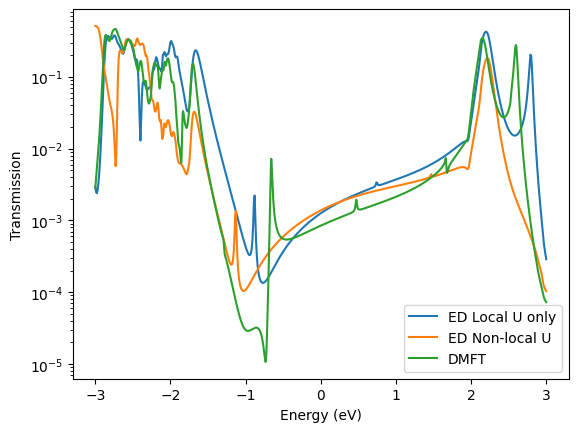

In [7]:
E1, T_only_local_U = np.load("../output/lowdin/ed/ET_Uii.npy")
E2, T_nonlocal_U = np.load("../output/lowdin/ed/ET.npy")
E3, T_dmft = np.load("../output/lowdin/dmft/non_spin/ET.npy")
plt.plot(E1, T_only_local_U, label='ED Local U only')
plt.plot(E2, T_nonlocal_U, label='ED Non-local U')
plt.plot(E3, T_dmft, label='DMFT')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.yscale('log')
plt.legend()
plt.show()

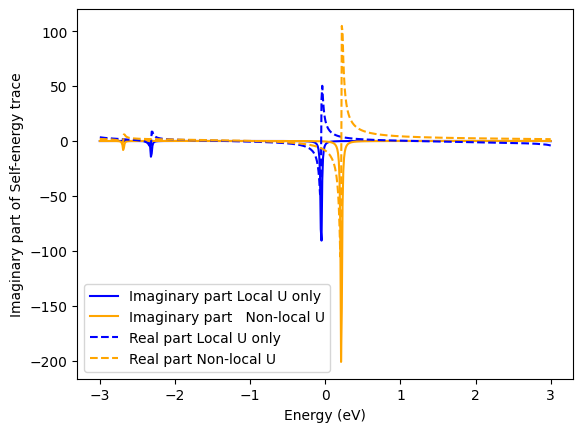

In [ ]:
se_only_local_U = np.load("../output/lowdin/ed/self_energy_with_dcc_Uii.npy")
trace_se_only_local_U = np.trace(se_only_local_U, axis1=1, axis2=2)
se_nonlocal_U = np.load("../output/lowdin/ed/self_energy_with_dcc.npy")
trace_se_nonlocal_U = np.trace(se_nonlocal_U, axis1=1, axis2=2)
plt.plot(E1, np.imag(trace_se_only_local_U), color = 'blue',label='Imaginary part Local U only')
plt.plot(E1, np.imag(trace_se_nonlocal_U), color = 'orange',label='Imaginary part   Non-local U')
plt.plot(E1, np.real(trace_se_only_local_U), color = 'blue',label='Real part Local U only', linestyle='--')
plt.plot(E1, np.real(trace_se_nonlocal_U), color = 'orange',label='Real part Non-local U', linestyle='--')
plt.xlabel('Energy (eV)')
plt.ylabel('Imaginary part of Self-energy trace')
plt.legend()
plt.show()


### Analysis using PPP formula for U

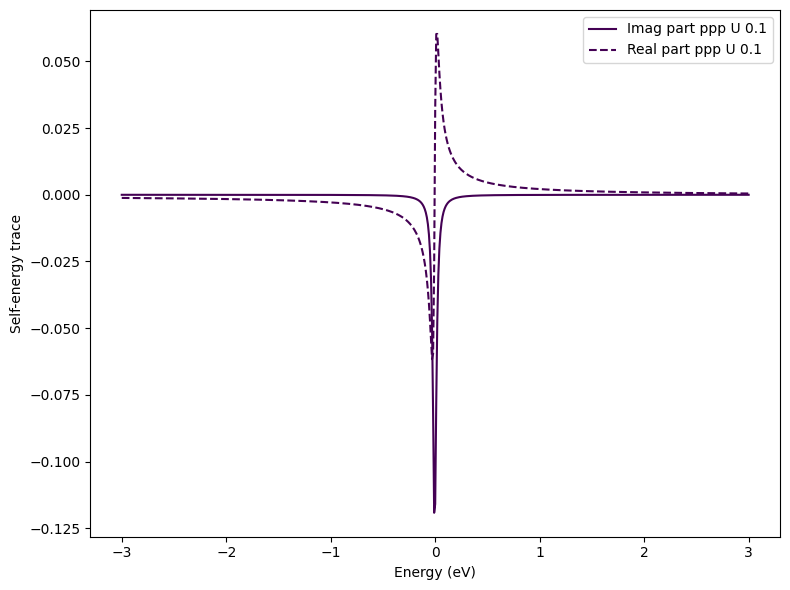

In [6]:
fig = plt.figure(figsize=(8, 6))

U_list = [0.1]   # add as many U values as you want
colors = plt.cm.viridis(np.linspace(0, 1, len(U_list)))

for U, color in zip(U_list, colors):

    if U == 4.75:
        filename = "../output/lowdin/ed/referee_response/ed_sigma_ppp.npy"
    else:
        filename = f"../output/lowdin/ed/referee_response/Uppp_{U}/ed_sigma_ppp_{U}.npy"

    se = np.load(filename)
    trace_se = np.trace(se, axis1=1, axis2=2)

    plt.plot(
        E1,
        np.imag(trace_se),
        color=color,
        label=f"Imag part ppp U {U}"
    )

    plt.plot(
        E1,
        np.real(trace_se),
        color=color,
        linestyle="--",
        label=f"Real part ppp U {U}"
    )

plt.xlabel("Energy (eV)")
plt.ylabel("Self-energy trace")
plt.legend()
plt.tight_layout()
plt.show()


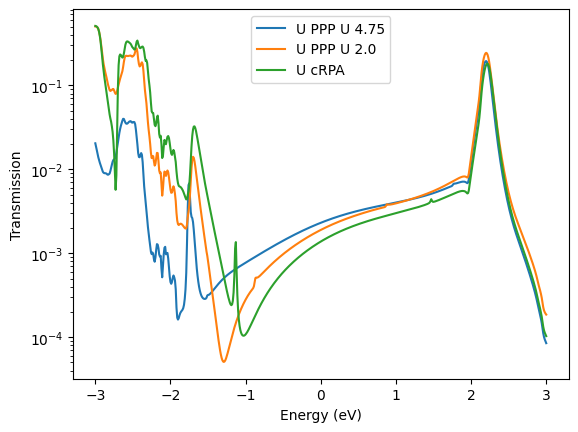

In [8]:
E,T_upp = np.load("../output/lowdin/ed/referee_response/ET_Uppp.npy")
E, T_upp_2 = np.load("../output/lowdin/ed/referee_response/ET_Uppp_2.0.npy")
plt.plot(E, T_upp, label='U PPP U 4.75')
plt.plot(E, T_upp_2, label='U PPP U 2.0')
plt.plot(E2, T_nonlocal_U, label='U cRPA')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.yscale('log')
plt.legend()
plt.show()